In [1]:
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from bm_functions import collect_correlation_results, collect_metadata


/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune/0315dac2b4ae/0315dac2b4ae_sth_adata.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune/09f38c1da700/09f38c1da700_sth_adata.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune/0ae757710434/0ae757710434_sth_adata.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune/0db98f0d9af7/0db98f0d9af7_sth_adata.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune/10f1e861a080/10f1e861a080_sth_adata.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune/1873b2061aee/1873b2061aee_sth_adata.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune/1912f4e7293c/1912f4e7293c_sth_adata.h5ad
/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune/21a4e65a43c9/21a4e65a43c9_sth_ada

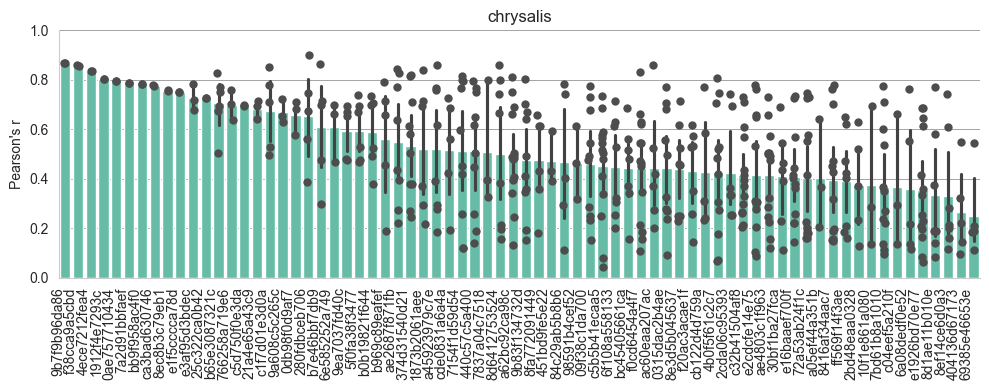

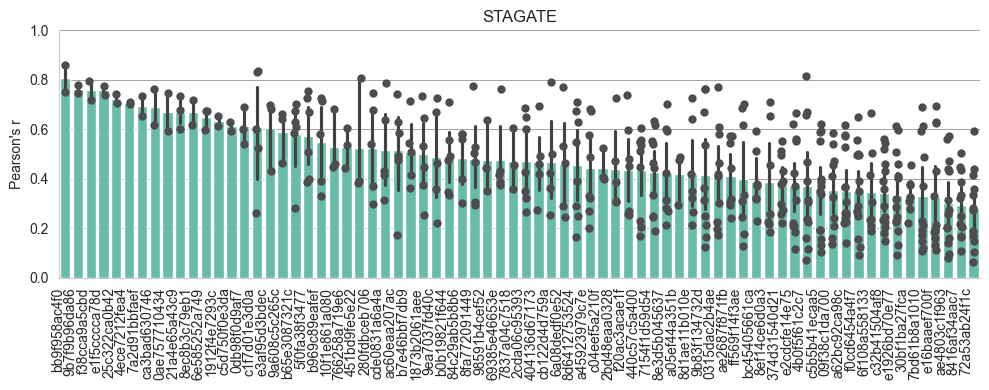

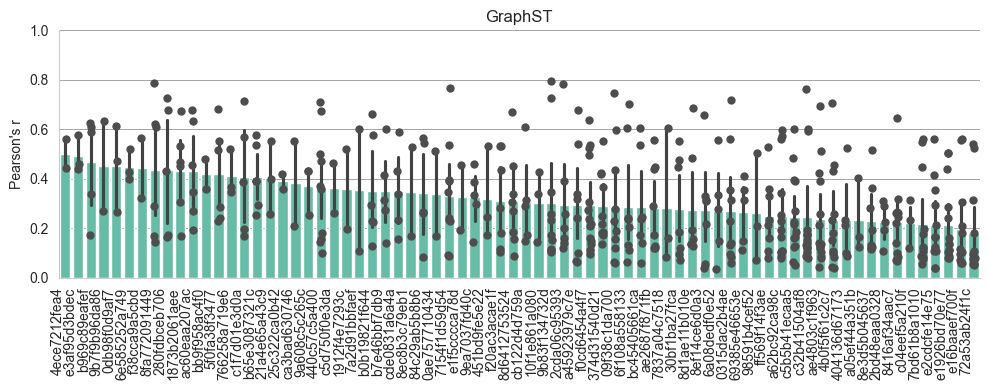

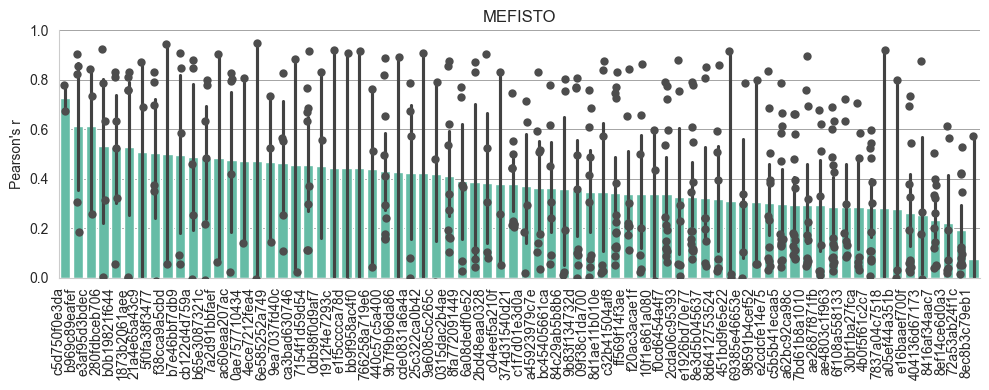

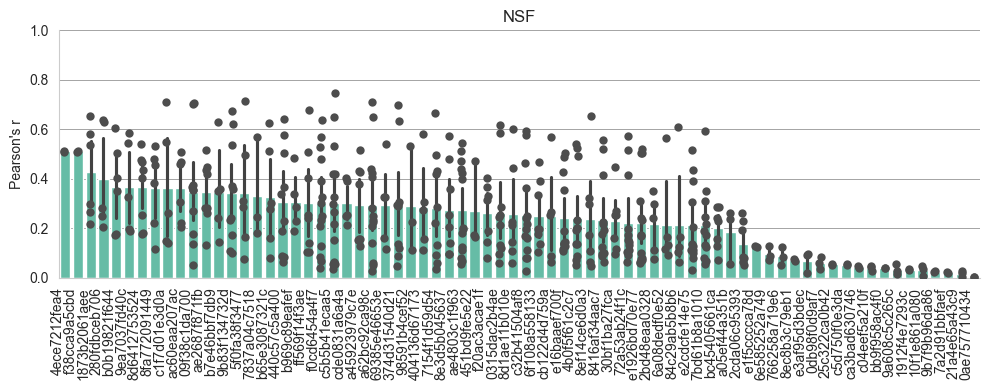

In [2]:
filepath = '/mnt/f/chrysalis/chrysalis_supplementary_data/I_synthetic_data/tabula_sapiens_immune'
adpaths = glob(filepath + '/*/*.h5ad')

meta_df = collect_metadata(adpaths)

method_suffix = {'chrysalis': 'chrysalis_', 'STAGATE': 'stagate_', 'GraphST': 'graphst_', 'MEFISTO': 'mefisto_', 'NSF': 'nsf_'}
method_df = pd.DataFrame()
method_df_mean = pd.DataFrame()
for name, suffix in method_suffix.items():
    csvs = glob(filepath + f'/*/{suffix}pearson.csv')
    df = collect_correlation_results(csvs, enforce_symmetry=False)

    df_melted = df.melt(var_name='index', value_name='correlation')
    df_melted = df_melted.merge(meta_df, left_on='index', right_index=True, how='left')
    df_melted = df_melted.dropna()

    # for col in df_melted.columns:
    #     if len(df_melted[col].unique()) == 1:
    #         df_melted.drop(col,inplace=True,axis=1)

    df_melted['method'] = name
    method_df = pd.concat([method_df, df_melted], axis=0, ignore_index=True)

    mean_corr_df = pd.DataFrame(df.mean()).T
    mean_df_melted = mean_corr_df.melt(var_name='hash', value_name='correlation')
    mean_df_melted['index'] = mean_df_melted.index
    mean_df_melted = mean_df_melted.drop(columns=['hash'])
    mean_df_melted = mean_df_melted.merge(meta_df, left_on='index', right_index=True, how='left')

    mean_df_melted['method'] = name
    method_df_mean = pd.concat([method_df_mean, mean_df_melted], axis=0, ignore_index=True)

    df = df.rename(columns={k: v for k, v in zip(meta_df.index, meta_df['hash'])})
    mean_corr = df.mean(axis=0).sort_values(ascending=False)

    # add arial font
    from matplotlib import font_manager

    font_files = mpl.font_manager.findSystemFonts()
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)
    # print(font_manager.get_font_names())

    plt.rcParams['svg.fonttype'] = 'none'

    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['arial']

    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    sns.barplot(df, ax=ax, color='#57CBAD', order=mean_corr.index)
    sns.stripplot(df, ax=ax, size=6, color=".3", order=mean_corr.index)
    ax.grid(axis='y', linestyle='-', linewidth='0.5', color='grey')
    ax.set_axisbelow(True)
    ax.set_ylabel("Pearson's r")
    ax.set_xlabel(None)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    for label in ax.get_xticklabels():
        label.set_rotation(90)
        label.set_verticalalignment('top')
        label.set_horizontalalignment('right')
        # label.set_y(1.02)  # Adjust this value to set a fixed y position for all labels

    ax.set_ylim((0, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(name)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_6005/3826438195.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(method_df_mean, x='method', y='correlation', palette=color_dict, showfliers=False,
/tmp/ipykernel_6005/3826438195.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


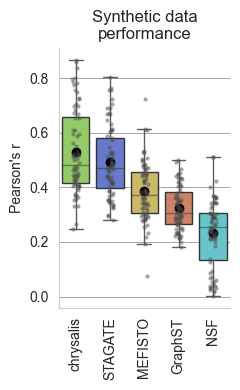

In [3]:
color_dict = {
    'chrysalis': '#91db57',
    'NSF': '#57d3db',
    'STAGATE': '#5770db',
    'MEFISTO': '#dbc257',
    'SpatialPCA': '#a157db',
    'GraphST': '#db7c57',
}

overall_mean = {}
for m in np.unique(method_df_mean['method']):
    v = method_df_mean.loc[method_df_mean['method'] == m, 'correlation'].mean()
    overall_mean[m] = v
overall_mean = pd.Series(overall_mean).sort_values(ascending=False)

import matplotlib.font_manager as fm

arial_font_path = '/mnt/c/Bern/fonts/arial.ttf'
font_prop = fm.FontProperties(fname=arial_font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['svg.fonttype'] = 'none'

fig, ax = plt.subplots(1, 1, figsize=(2.5, 4))
# sns.boxplot(method_df_mean, x='method', y='correlation', ax=ax)
sns.boxplot(method_df_mean, x='method', y='correlation', palette=color_dict, showfliers=False,
            boxprops={'edgecolor': "0.2"}, medianprops={"color": "0.2", 'alpha': 0.5},
            showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'black', 'markeredgecolor': 'black'},
            order=overall_mean.index)
sns.stripplot(method_df_mean, x='method', y='correlation', ax=ax, size=3, color=".3", alpha=0.5,
              order=overall_mean.index)
ax.grid(axis='y', linestyle='-', linewidth='0.5', color='grey')
ax.set_axisbelow(True)
ax.set_ylabel("Pearson's r")
ax.set_xlabel(None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Synthetic data\nperformance')
plt.tight_layout()
plt.show()
